In [ ]:
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

In [ ]:

import os
import zipfile
from google.colab import drive

drive.mount('/content/drive')

local_zip = 'drive/My Drive/Tomatoes.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

image_size = [224, 224]

base_dir = '/tmp/Tomatoes'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
train_path = train_dir
valid_path = validation_dir

Mounted at /content/drive


In [ ]:
inception = InceptionV3(input_shape=image_size + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(inception.output)
prediction = Dense(3, activation='softmax')(x)

In [ ]:
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 244 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-10-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
8/8 [==============================] - 44s 5s/step - loss: 5.9720 - accuracy: 0.6721 - val_loss: 8.1337 - val_accuracy: 0.3667
Epoch 2/10
8/8 [==============================] - 38s 5s/step - loss: 2.0354 - accuracy: 0.8074 - val_loss: 4.5599 - val_accuracy: 0.8667
Epoch 3/10
8/8 [==============================] - 38s 5s/step - loss: 0.8778 - accuracy: 0.8852 - val_loss: 3.9091 - val_accuracy: 0.9000
Epoch 4/10
8/8 [==============================] - 38s 5s/step - loss: 0.3241 - accuracy: 0.9508 - val_loss: 4.2744 - val_accuracy: 0.9333
Epoch 5/10
8/8 [==============================] - 39s 5s/step - loss: 0.2863 - accuracy: 0.9549 - val_loss: 4.6911 - val_accuracy: 0.9000
Epoch 6/10
8/8 [==============================] - 38s 5s/step - loss: 0.1184 - accuracy: 0.9754 - val_loss: 5.2577 - val_accuracy: 0.9333
Epoch 7/10
8/8 [==============================] - 39s 5s/step - loss: 0.0680 - accuracy: 0.9795 - val_loss: 5.4428 - val_accuracy: 0.9333
Epoch 8/10
8/8 [==================

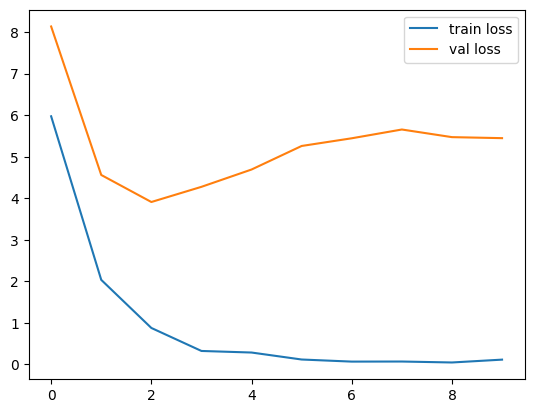

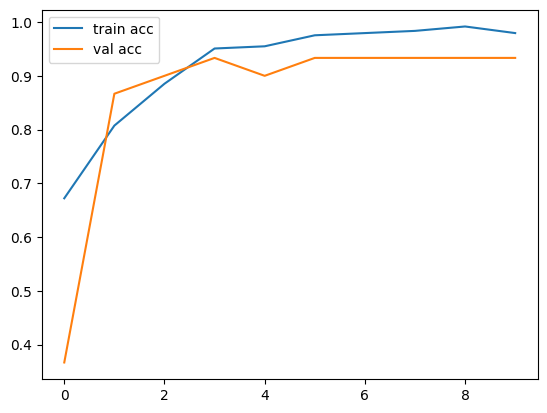

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model.predict(test_set)
y_pred

8/8 [==============================] - 31s 4s/step


array([[9.99999940e-01, 0.00000000e+00, 0.00000000e+00],
       [4.42536331e-26, 1.87761942e-15, 9.99999940e-01],
       [1.50354457e-15, 9.99999940e-01, 1.30626632e-09],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00],
       [1.66173539e-29, 9.99999940e-01, 4.56983678e-08],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00, 2.23132074e-29],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00],
       [2.78052445e-31, 2.31640731e-11, 9.99999940e-01],
       [9.99999940e-01, 0.00000000e+00, 0.00000000e+00],
       [9.99999940e-01, 1.55489255e-37, 1.64469909e-32],
       [8.73579390e-26, 9.99999821e-01, 8.95150549e-08],
       [9.99999940e-01, 0.00000000e+00, 3.93264904e-28],
       [1.18501533e-19, 2.71547627e-20, 9.99999940e-01],
       [9.99999940e-01, 0.00000

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1,
       2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 2,
       2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0])